# Erstellen eines DesicionTrees und eines RandomForests und eines ExtraTreeClassifiers zum Vorhersagen des Statueses (Dropout, Graduate) von Studenten
Im Folgenden werden die verschiedenen supervised learning Verfahren, um zu bestimmen, ob Studenten ihr Studium abgebrochen haben, abgeschlossen haben oder derzeit studieren. Dies kann verwendet werden, um vorherzusagen, welche Studenten ein Studium abbrechen, um diesen Unterstützungsangebote zur Verfügung zu stellen.

Die Bestimmung erfolgt anhand der Daten
- Curricular units 2nd sem (grade)
- Curricular units 2nd sem (approved)
- Curricular units 2nd sem (evaluations)
- Curricular units 2nd sem (enrolled)
- Curricular units 2nd sem (credited)
- Curricular units 1st sem (grade)
- Curricular units 1st sem (approved)
- Curricular units 1st sem (evaluations)
- Curricular units 1st sem (enrolled)
- Curricular units 1st sem (credited)
- International, Father\'s occupation
- Mother\'s occupation



In [1]:
# Import aller benötigten Pakete
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree,ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, average_precision_score, zero_one_loss, f1_score
import seaborn as sns

## Einlesen der CSV in ein DataFrame
Verwendet werden die Daten über Studenten aus dem [Dataset mit Studentendaten](https://www.kaggle.com/datasets/thedevastator/higher-education-predictors-of-student-retention) auf Kaggle verwendet.

In [2]:
df_data=pd.read_csv(r"dataset.csv")

Hier wird ein erster Überblick über die ersten fünf Zeilen des Datensets gegeben, um zu sehen, wie die Spalten benannt sind und in welcher Form die Daten vorliegen.

In [3]:
df_data.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [4]:
df_data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [5]:
df_data=df_data[df_data['Target']!='Enrolled'] # Studenten, die derzeit im Studium sind, werden hier entfernt, da diese für die Klassifikation von nicht relevant sind.

In [6]:
df_data.info() # überprüfen, welche Datentypen die Daten haben, um zu schauen, ob ein Encoding notwendig ist.

<class 'pandas.core.frame.DataFrame'>
Index: 3630 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  3630 non-null   int64  
 1   Application mode                                3630 non-null   int64  
 2   Application order                               3630 non-null   int64  
 3   Course                                          3630 non-null   int64  
 4   Daytime/evening attendance                      3630 non-null   int64  
 5   Previous qualification                          3630 non-null   int64  
 6   Nacionality                                     3630 non-null   int64  
 7   Mother's qualification                          3630 non-null   int64  
 8   Father's qualification                          3630 non-null   int64  
 9   Mother's occupation                           

## One-hot-encoding der Spalte "Target"
Da die Spalte "Target" in Form von Strings vorliegt, werden die Strings in drei Spalten aufgeteilt, die jeweils die boolschen Werte True und False enthalten. Dies muss getan werden, da die Modelle Strings nicht verarbeiten können.

In [7]:
df_data = pd.get_dummies(df_data, columns=['Target']) #One-Hot-encoding mit pandas, ebenfalls mit scikit-learn möglich

In [8]:
df_data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target_Dropout,Target_Graduate
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0.000000,0,10.8,1.4,1.74,True,False
1,1,6,1,11,1,1,1,1,3,4,...,6,6,6,13.666667,0,13.9,-0.3,0.79,False,True
2,1,1,5,5,1,1,1,22,27,10,...,6,0,0,0.000000,0,10.8,1.4,1.74,True,False
3,1,8,2,15,1,1,1,23,27,6,...,6,10,5,12.400000,0,9.4,-0.8,-3.12,False,True
4,2,12,1,3,0,1,1,22,28,10,...,6,6,6,13.000000,0,13.9,-0.3,0.79,False,True


## Aufteilen der Daten in Data und Target, bzw. Train und Test

In [9]:
# Trennen von Daten (X) und zu vorhersagenden Labels (y)
X=df_data.iloc[:,:-2]
y=df_data.iloc[:,-2:]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #splitten in Trainings- und Testdaten im Verhältniss 80:20

## Erstellen einer Heatmap zum Veranschaulichen von Korrelationen
Um Overfitting zu vermeiden und die Trainingszeit zu verkürzen, werden die Daten hier in einer Heatmap dargestellt, damit Dimensionen, die eine geringe Korrelation zu anderen Dimensionen haben nicht für die Vorhersage verwendet werden.

In [11]:
df_corr=pd.concat([X_train,y_train]) # Erstellen eines DataFrames mit den Trainingsdaten

In [12]:
corr=df_corr.corr() # Berechnen der Korrelationskoeffizienten

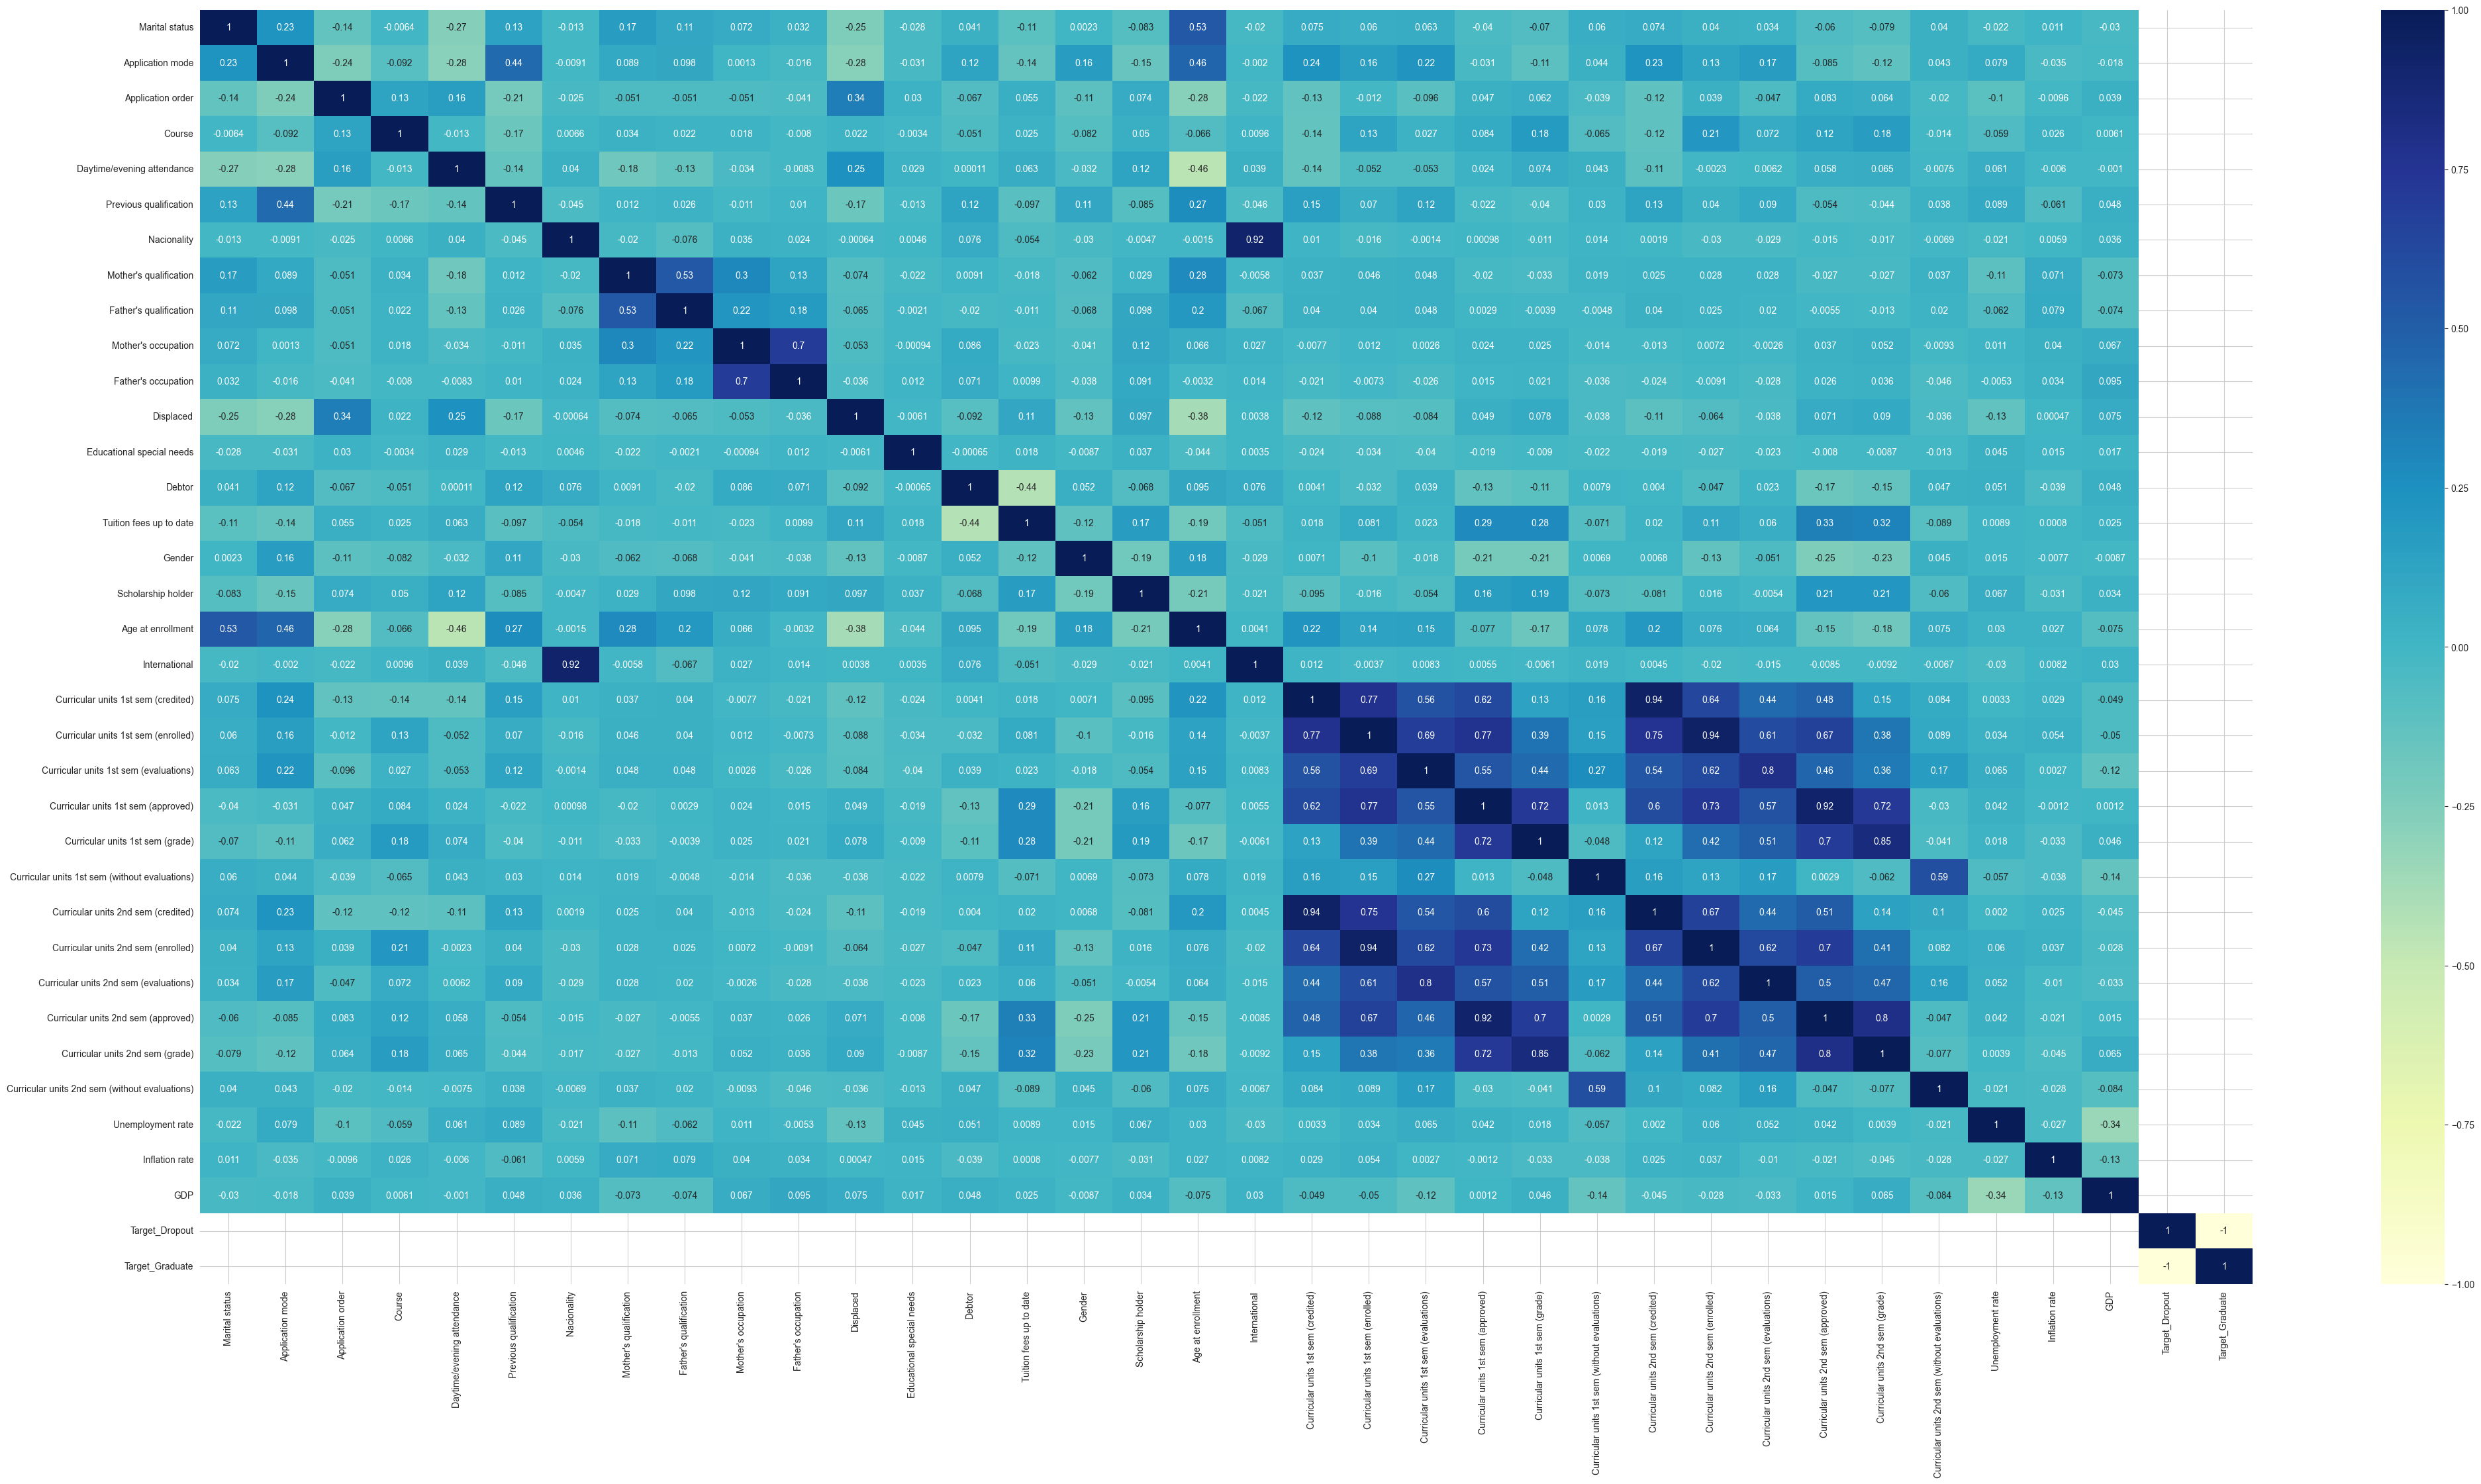

In [13]:
fig, ax = plt.subplots(figsize=(50, 25)) # Bestimmen der Größe der Heatmap
sns.heatmap(corr, ax=ax, cmap="YlGnBu", annot=True) # Erstellen der Heatmap
plt.show()

In der Heatmap kann man erkennen, dass es Elemente gibt, die eine niedrige Korrelation zu einander haben, wie zum Beispiel das BIP (GDP) und der Kurs (Course). Diese Elemente werden bei der Vorhersage nicht berücksichtigt, da ihre Verwendung das Modell kaumoder gar nicht beeinflussen würde.

## Plotten einiger Label mit hoher korrelation, um zu schauen, ob diese interessante Informationen enthalten
gewählt wurden hier, die Anzahl an internationalen Studenten, die Korrelation aus dem Beruf der Mutter und des Vaters, sowie die Korrelation aus credited units im ersten und zweiten Semester.

Text(0, 0.5, 'Curriculum units 1st sem (credited)')

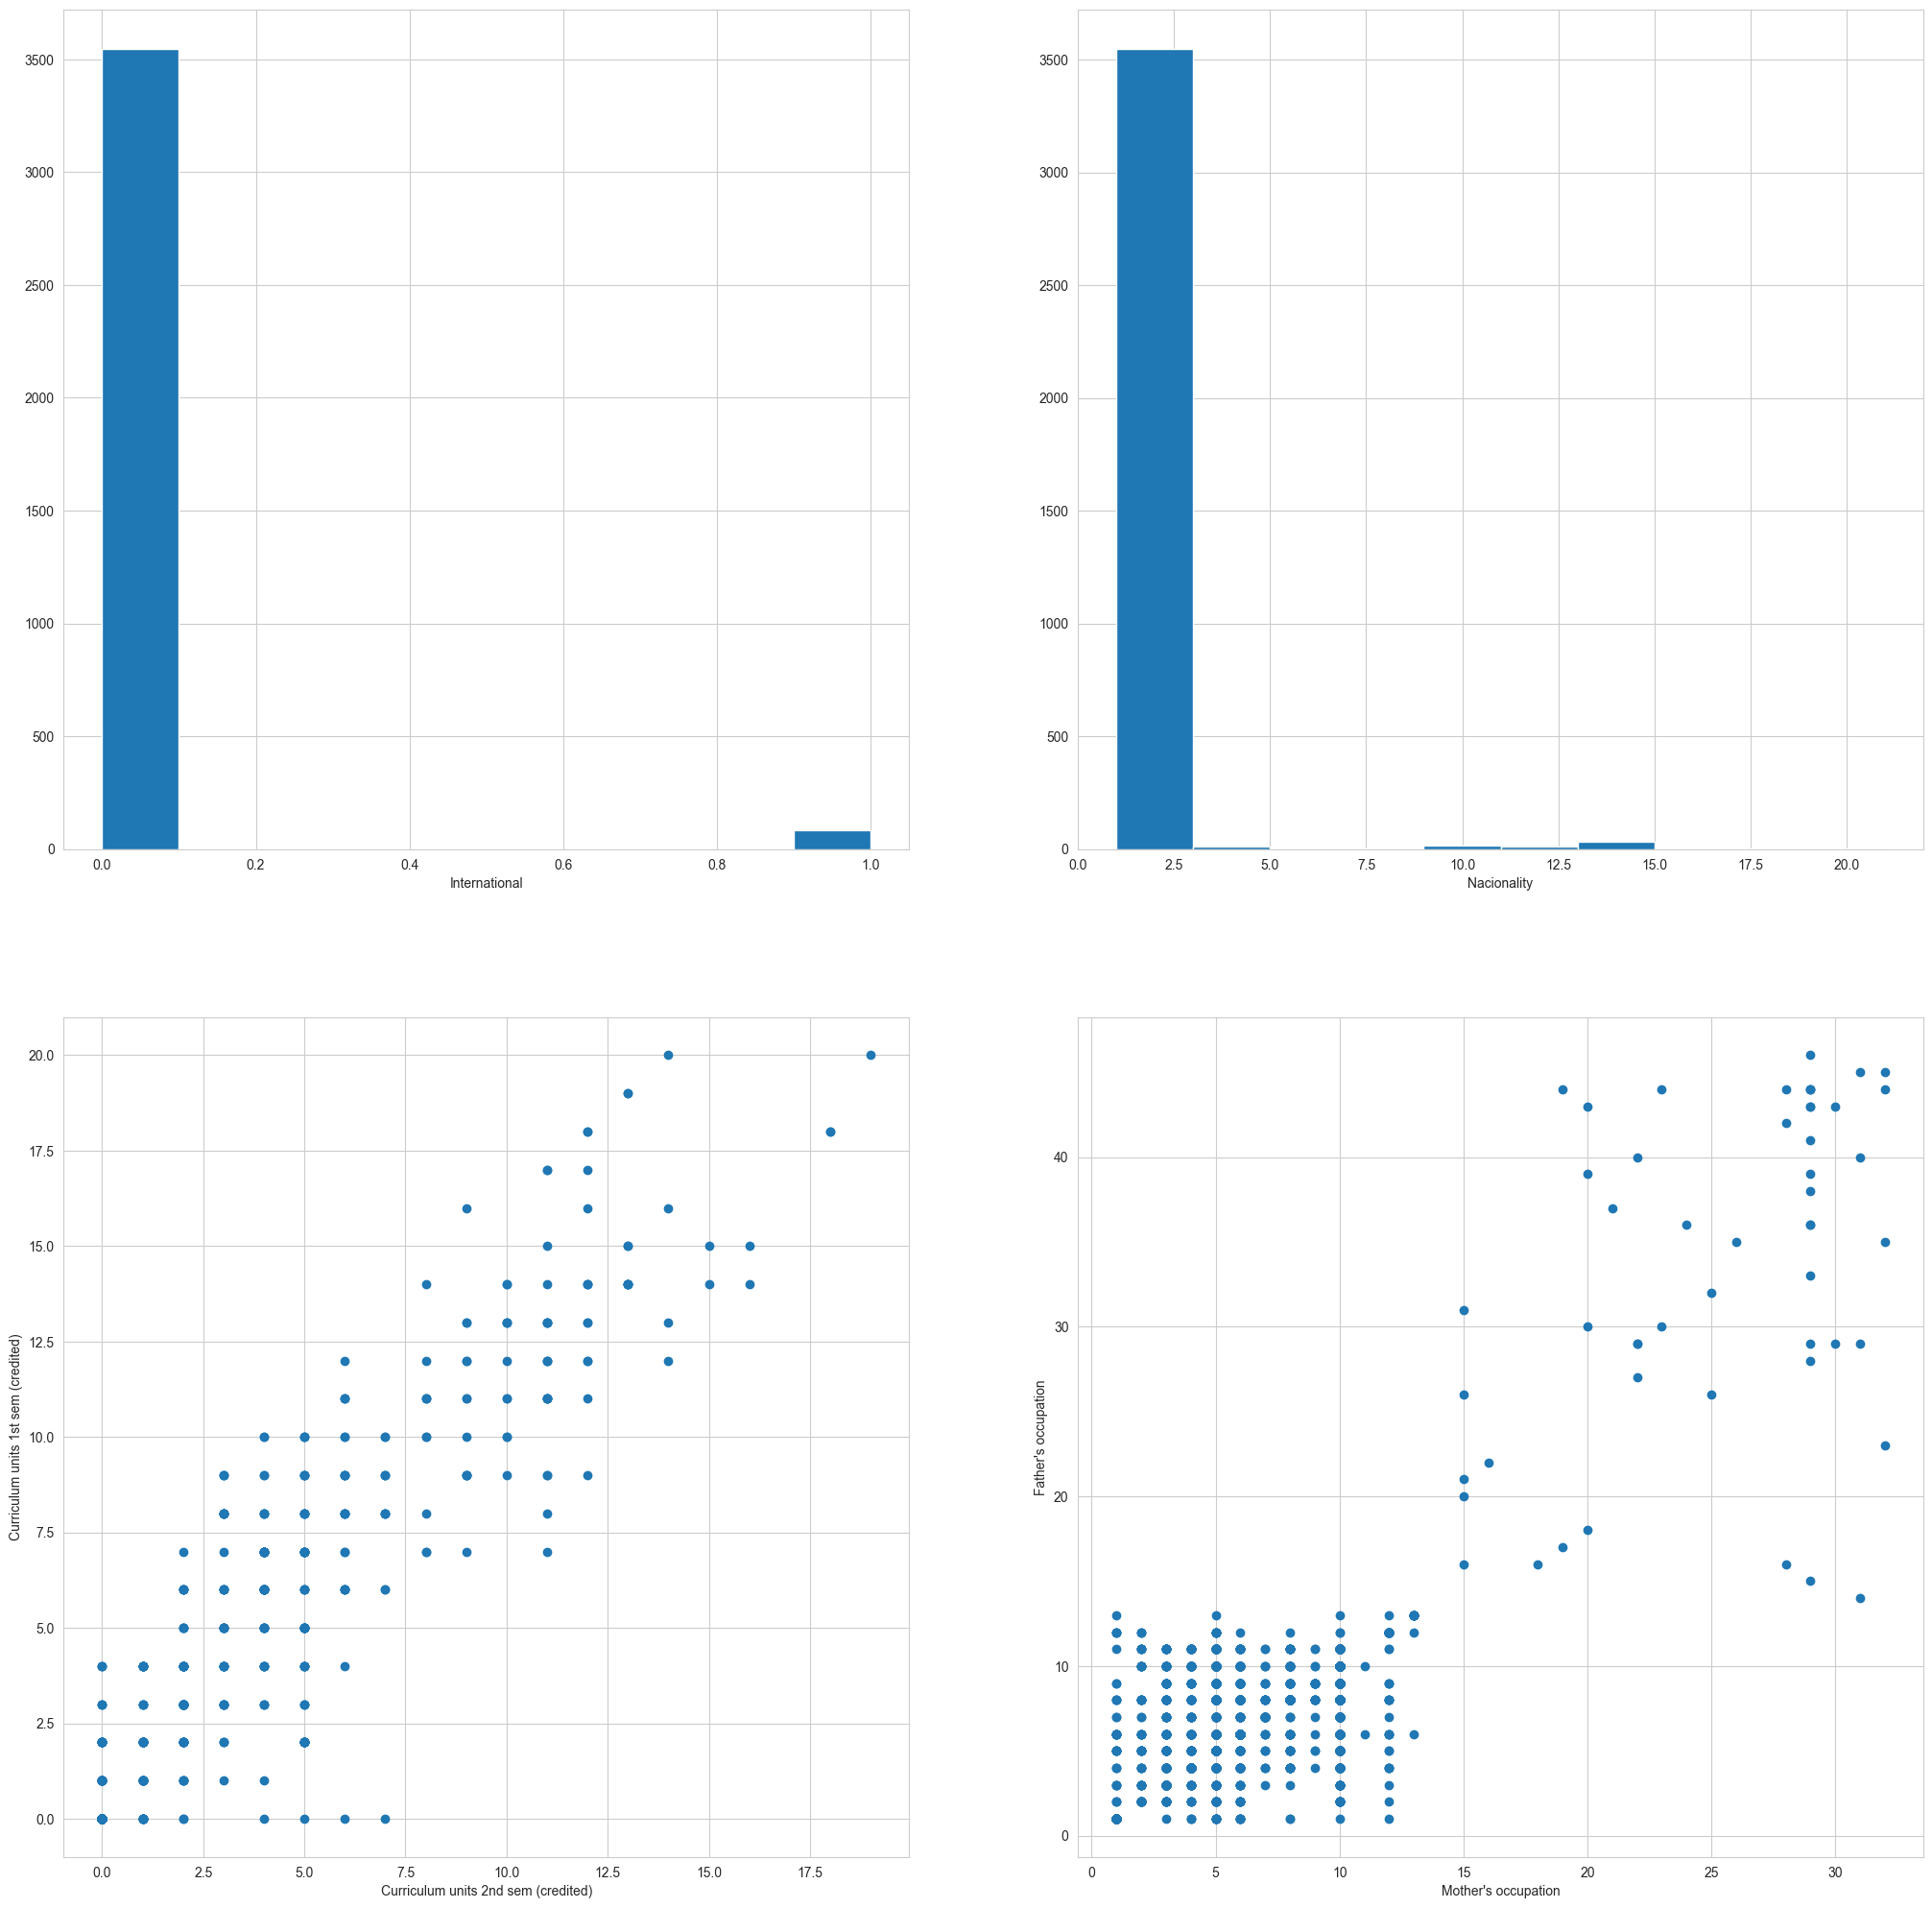

In [14]:
fig,axs=plt.subplots(nrows=2,ncols=2,figsize=(25,25))

# Erstellen eines Histogramms, das anzeigt, ob Studenten aus dem Ausland über Programme wie Erasmus kommen (Ja/Nein)
axs[0,0].hist(X['International'])
axs[0,0].set_xlabel('International')

# Erstellen eines Histogrammes, dass die Nationalität der Studenten zeigt (int)
axs[0,1].hist(X['Nacionality'])
axs[0,1].set_xlabel('Nacionality')

# Erstellen eines Scatterplots, der die Berufe von Mutter und Vater abbildet (int)
axs[1,1].scatter(X['Mother\'s occupation'],X['Father\'s occupation'])
axs[1,1].set_xlabel('Mother\'s occupation')
axs[1,1].set_ylabel('Father\'s occupation')

# Erstellen eines Scatterplots, der die Anzahl an angerechneten Curricular Units im ersten und zweiten Semester anzeigt (int)
axs[1,0].scatter(X['Curricular units 2nd sem (credited)'],X['Curricular units 1st sem (credited)'])
axs[1,0].set_xlabel('Curriculum units 2nd sem (credited)')
axs[1,0].set_ylabel('Curriculum units 1st sem (credited)')


Man kann hier in den oberen Histogrammen sehen, dass der Großteil der Studenten keine internationalen Studenten sind, außerdem besteht augenscheinlich eine Korrelation zwischen den credited Curriculum Units des ersten und zweiten Semesters. Des Weiteren sieht man, dass viele der Eltern ähnliche Jobs haben.

## Erstellen und Trainieren des DecisionTree
Ein Entscheidungsbaum (DecisionTree) ist ein Graph, in welchem anhand von Kriterien, hier gini, berechnet wird, in welche Kategorie ein Wert fällt.
Hier wird ein DesicionTree mit verschiedenen Parametern trainiert. Durch mehrere Durchläufe ergaben sich die unten zu sehenden Parameter, für die sich die besten Scores ergaben.

In [52]:
#clf=DecisionTreeClassifier(max_depth=5, criterion='gini', random_state=42, max_leaf_nodes=15, min_samples_leaf=15,) # Initialisieren des Objektes Decision Tree
clf=DecisionTreeClassifier(max_depth=10, criterion='gini', random_state=100, max_features=15, min_samples_split=5, max_leaf_nodes=50)
clf.fit(X_train, y_train) #Trainieren des DecisionTrees

DecisionTreeClassifier(max_depth=10, max_features=15, max_leaf_nodes=50,
                       min_samples_split=5, random_state=100)

### Testen des Baums
Messen der Klassifikationsraten mit verschiedenen Metriken, namentlich, dem Accuracy Score, dem Zero-to-one Loss, der average Precision und dem F1 weighted Average

In [53]:
print(f"Accuracy Score: {accuracy_score(y_test, clf.predict(X_test))}") # Zuordnung, wie viele der vorhergesagten Label zu den tatsächlichen Labeln passen
print(f"Zero-to-One-loss: {zero_one_loss(y_test, clf.predict(X_test), normalize=False)}")  # Anzahl an falsch klassifizierten Labels
print(f"Average Precision: {average_precision_score(y_test, clf.predict(X_test))}") # berechnet die durchschnittliche Präzession mit \\text{AP} = \\sum_n (R_n - R_{n-1}) P_n
print(f"F1 weighted average: {f1_score(y_test, clf.predict(X_test), average='weighted')}") # berechnet den gewichteten F1 Score mit \\text{F1} = \\frac{2 * \\text{TP}}{2 * \\text{TP} + \\text{FP} + \\text{FN}}

Accuracy Score: 0.9008264462809917
Zero-to-One-loss: 72.0
Average Precision: 0.8517217091030611
F1 weighted average: 0.9007579175467738


In [54]:
multilabel_confusion_matrix(y_test,clf.predict(X_test)) # Erstellen einer multi-label Konfusionsmatrix

array([[[431,  18],
        [ 52, 225]],

       [[225,  52],
        [ 20, 429]]])

### Plotten des Baums

[Text(0.37755102040816324, 0.9545454545454546, 'x[22] <= 4.5\ngini = 0.478\nsamples = 2904\nvalue = [[1760, 1144]\n[1144, 1760]]'),
 Text(0.18877551020408162, 0.8636363636363636, 'x[28] <= 3.5\ngini = 0.311\nsamples = 1069\nvalue = [[206, 863]\n[863, 206]]'),
 Text(0.28316326530612246, 0.9090909090909092, 'True  '),
 Text(0.12244897959183673, 0.7727272727272727, 'x[3] <= 2.5\ngini = 0.166\nsamples = 866\nvalue = [[79, 787]\n[787, 79]]'),
 Text(0.08163265306122448, 0.6818181818181818, 'x[17] <= 24.5\ngini = 0.499\nsamples = 133\nvalue = [[64, 69]\n[69, 64]]'),
 Text(0.061224489795918366, 0.5909090909090909, 'x[13] <= 0.5\ngini = 0.498\nsamples = 117\nvalue = [[62, 55]\n[55, 62]]'),
 Text(0.04081632653061224, 0.5, 'x[14] <= 0.5\ngini = 0.491\nsamples = 104\nvalue = [[59, 45]\n[45, 59]]'),
 Text(0.02040816326530612, 0.4090909090909091, 'gini = 0.18\nsamples = 10\nvalue = [[1, 9]\n[9, 1]]'),
 Text(0.061224489795918366, 0.4090909090909091, 'x[33] <= -3.59\ngini = 0.473\nsamples = 94\nvalue 

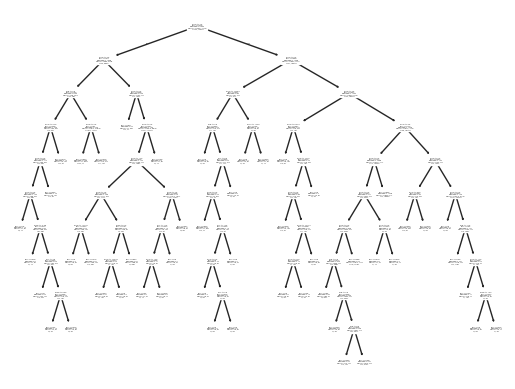

In [55]:
plot_tree(clf)

## Erstellen und Trainieren eines RandomForests
Ein Random Forest ist eine Ansammlung mit, hier 100, DecisionTrees, die alle auf ein separates Ergebnis kommen. Dieses ERgebnis wird genommen und in einem Mehrheotsvotum wird dann die engültige Entscheidung bestimmt. <br>
Hier wird ein RandomForest mit verschiedenen Parametern trainiert. Die Parameter wurden im Finetuning so abgestimmt, dass durchschnittlich die besten Scores über alle getesteten Metriken erreicht werden.


In [56]:
rf=RandomForestClassifier(n_estimators=100, random_state=80, max_depth=15,) # Deklaration und Initialisirung
rf.fit(X_train, y_train) # Training

RandomForestClassifier(max_depth=15, random_state=80)

### Testen des Forests
Messen der Klassifikationsraten mit verschiedenen Metriken, namentlich, dem Accuracy Score, dem Zero-to-one Loss, der average Precision und dem F1 weighted Average

In [57]:
print(f"Accuracy Score: {accuracy_score(y_test, rf.predict(X_test))}")
print(f"Zero-to-One-loss: {zero_one_loss(y_test, rf.predict(X_test),normalize=False)}")
print(f"Average Precision: {average_precision_score(y_test, rf.predict(X_test))}")
print(f"F1 weighted average: {f1_score(y_test, rf.predict(X_test), average='weighted')}")

Accuracy Score: 0.8925619834710744
Zero-to-One-loss: 78.0
Average Precision: 0.837265750368906
F1 weighted average: 0.891428303101857


In [58]:
multilabel_confusion_matrix(y_test,rf.predict(X_test)) # Erstellen einer multi-label Konfusionsmatrix

array([[[423,  26],
        [ 52, 225]],

       [[225,  52],
        [ 26, 423]]])

## ExtraTreeClassifier
Der Extra Tree Classifier ist eine Erweiterung des Random Forests, bei der jeder Baum zufällig Merkmale erhält und zufällige Split Punkte ausgewählt werden. Im letzten Schritt wird auch hier ein Mehrheitsvotum durchgeführt.
Hier wird ein ExtraTreeClassifier mit verschiedenen Parametern trainiert. Die Parameter wurden im Finetuning so abgestimmt, dass die bestmöglichen Scores über alle geprüften Metriken erreicht werden.

In [59]:
#ext=ExtraTreeClassifier(max_depth=10, criterion='gini', random_state=100, max_features=15, min_samples_split=5, max_leaf_nodes=50) #Deklaration und Initialisierung
ext=ExtraTreeClassifier(random_state=80, max_depth=15,)
ext.fit(X_train, y_train) #Training

ExtraTreeClassifier(max_depth=15, random_state=80)

### Testen des Forests
Messen der Klassifikationsraten mit verschiedenen Metriken, namentlich, dem Accuracy Score, dem Zero-to-one Loss, der average Precision und dem F1 weighted Average

In [60]:
print(f"Accuracy Score: {accuracy_score(y_test, ext.predict(X_test))}")
print(f"Zero-to-One-loss: {zero_one_loss(y_test, ext.predict(X_test), normalize=False)}")
print(f"Average Precision: {average_precision_score(y_test, ext.predict(X_test))}")
print(f"F1 weighted average: {f1_score(y_test, ext.predict(X_test), average='weighted')}")

Accuracy Score: 0.8236914600550964
Zero-to-One-loss: 128.0
Average Precision: 0.7573449161308228
F1 weighted average: 0.8275538526410073


In [61]:
multilabel_confusion_matrix(y_test,ext.predict(X_test)) # Erstellen einer multi-label Konfusionsmatrix

array([[[394,  55],
        [ 69, 208]],

       [[212,  65],
        [ 59, 390]]])

[Text(0.40060124086985394, 0.96875, 'x[11] <= 0.703\ngini = 0.478\nsamples = 2904\nvalue = [[1760, 1144]\n[1144, 1760]]'),
 Text(0.16408117529880478, 0.90625, 'x[28] <= 1.552\ngini = 0.498\nsamples = 1293\nvalue = [[691, 602]\n[602, 691]]'),
 Text(0.2823412080843294, 0.9375, 'True  '),
 Text(0.02656042496679947, 0.84375, 'x[20] <= 2.814\ngini = 0.042\nsamples = 375\nvalue = [[8, 367]\n[367, 8]]'),
 Text(0.024435590969455512, 0.78125, 'x[17] <= 19.281\ngini = 0.391\nsamples = 30\nvalue = [[8, 22]\n[22, 8]]'),
 Text(0.019123505976095617, 0.71875, 'x[5] <= 4.986\ngini = 0.444\nsamples = 12\nvalue = [[4, 8]\n[8, 4]]'),
 Text(0.01699867197875166, 0.65625, 'x[5] <= 1.721\ngini = 0.463\nsamples = 11\nvalue = [[4, 7]\n[7, 4]]'),
 Text(0.014873837981407702, 0.59375, 'x[3] <= 7.642\ngini = 0.48\nsamples = 10\nvalue = [[4, 6]\n[6, 4]]'),
 Text(0.012749003984063745, 0.53125, 'x[33] <= 1.632\ngini = 0.494\nsamples = 9\nvalue = [[4, 5]\n[5, 4]]'),
 Text(0.010624169986719787, 0.46875, 'x[7] <= 13.287

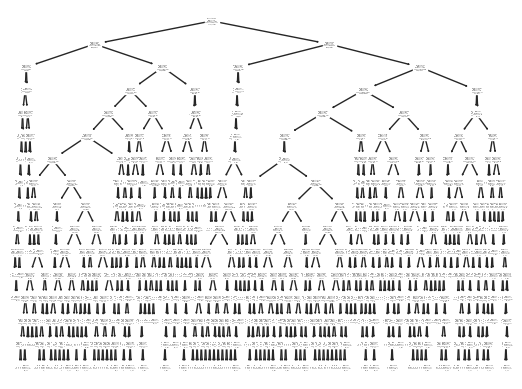

In [62]:
plot_tree(ext)

# Fazit
In diesem Projekt wurden verschiedene Machine Learning Modelle verwendet, um anhand von historischen Daten vorherzusagen, ob Studenten einen Studiengang abbrechen oder ob sie graduieren werden. Hierfür wurden ein Decision Tree, ein Random Forest und ein Extra Tree verwendet und die Klassifikationsraten mit dem Accuracy Score, der durchschnittlichen Präzession, dem Zero-to-One-loss und dem gewichteten F1 Durchschnitt gemessen. <br>
Die Accuracy Scores von durchschnittlich 89% und einer durchschnittlichen Präzesion von 83% eignen sich alle drei Modelle für die Klassifikation von Studenten, die voraussichtlich ihr Studium abbrechen verwenden. <br>
Laut Konfusionsmatrizen wurden hier durchschnittlich 77 Elemtente falsch klassifiziert. Der Entscheidungsbaum klassifizierte nur 74 Elemente falsch, während der RandomForest und der ExtraTreeClassifier 78 Elemente falsch klassifiziert hat. <br>
Zusammenfassend kann man also sagen, dass alle drei Modelle dafür eingesetzt werden können, um zu bestimmen, welche Studenten voraussichtlich ihr Studium abbrechen und ggf. Förderung benötigen, da alle Modelle sehr ähnliche Ergebnisse erreichen. Mit weiteren Daten, wäre es vermutlich möglich, dass bessere Ergebnisse erreicht werden und
möglicherweise könnte man die drei Modelle auch kombiniert als Ensemble nutzen, um eine höhere Genauigkeit zu erreichen. Allerdings kann das Modell nie zu 100% etwas vorhersagen, da die Motivation der Studenten nicht mit eingerechnet werden kann. <br>

## Learnings
- Nicht alle hohen Korrelationswerte in der Heatmap zeigen wichtige Merkmale an, z.B. Nacionality und Internation
- Verschiedene Messungen können gleiche Ergebnisse hervorbringen
- RandomForests und ExtraTrees lassen sich so trainieren, dass sie auf gleiche Ergebnisse kommen, trotz zufälliger Zuteilung